Time Series Data

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stock_data = yf.download('AAPL', start='2022-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645676,179.499605,174.425170,174.542947,104487900
2022-01-04,176.378342,179.558457,175.809061,179.254190,99310400
2022-01-05,171.686737,176.839695,171.411914,176.290048,94537600
2022-01-06,168.820694,172.059699,168.467348,169.507752,96904000
2022-01-07,168.987534,170.921120,167.868606,169.694226,86709100
2022-01-10,169.007172,169.311439,165.061475,165.954658,106765600
2022-01-11,171.843735,171.941877,167.662484,169.134757,76138300
2022-01-12,172.285461,173.904956,171.588594,172.864552,74805200


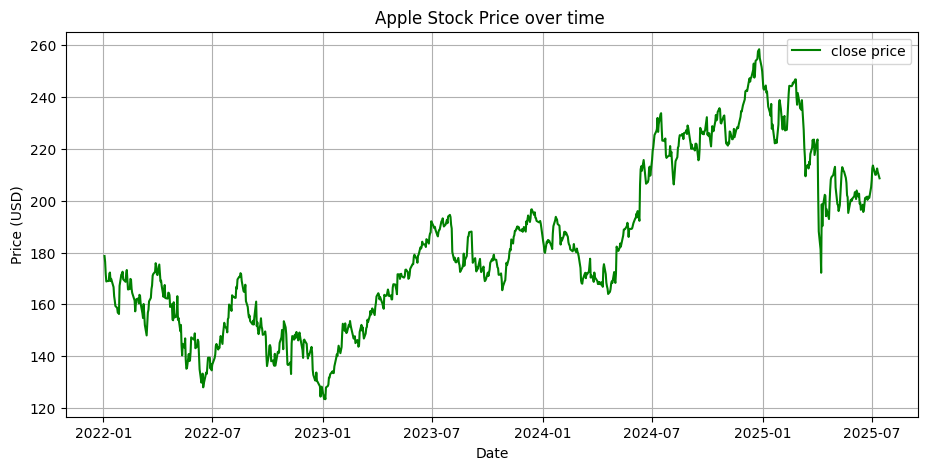

In [ ]:
plt.figure(figsize=(11,5))
plt.plot(stock_data.index, stock_data['Close'], label='close price', color='green')
plt.title('Apple Stock Price over time ')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

**Classical Time Series Decompostions**

Statsmodels is a Python library for statistical modeling, such as regression or time series analysis, hypothesis testing, and model diagnostics.

The statsmodels library in Python offers the seasonal_decompose() function for decomposing time series data into trend, seasonal, and residual components.

 You can visually inspect the plots. If the seasonal component's amplitude is roughly constant across time,
 it suggests an additive model. If the seasonal component's amplitude changes proportionally to the level of the trend, it suggests a multiplicative model.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additvie = seasonal_decompose(stock_data['Close'], model='additive', period=30)


In [ ]:
trends_additive = decomposition_additvie.trend
seasonal_additive = decomposition_additvie.seasonal
residual_additive = decomposition_additvie.resid

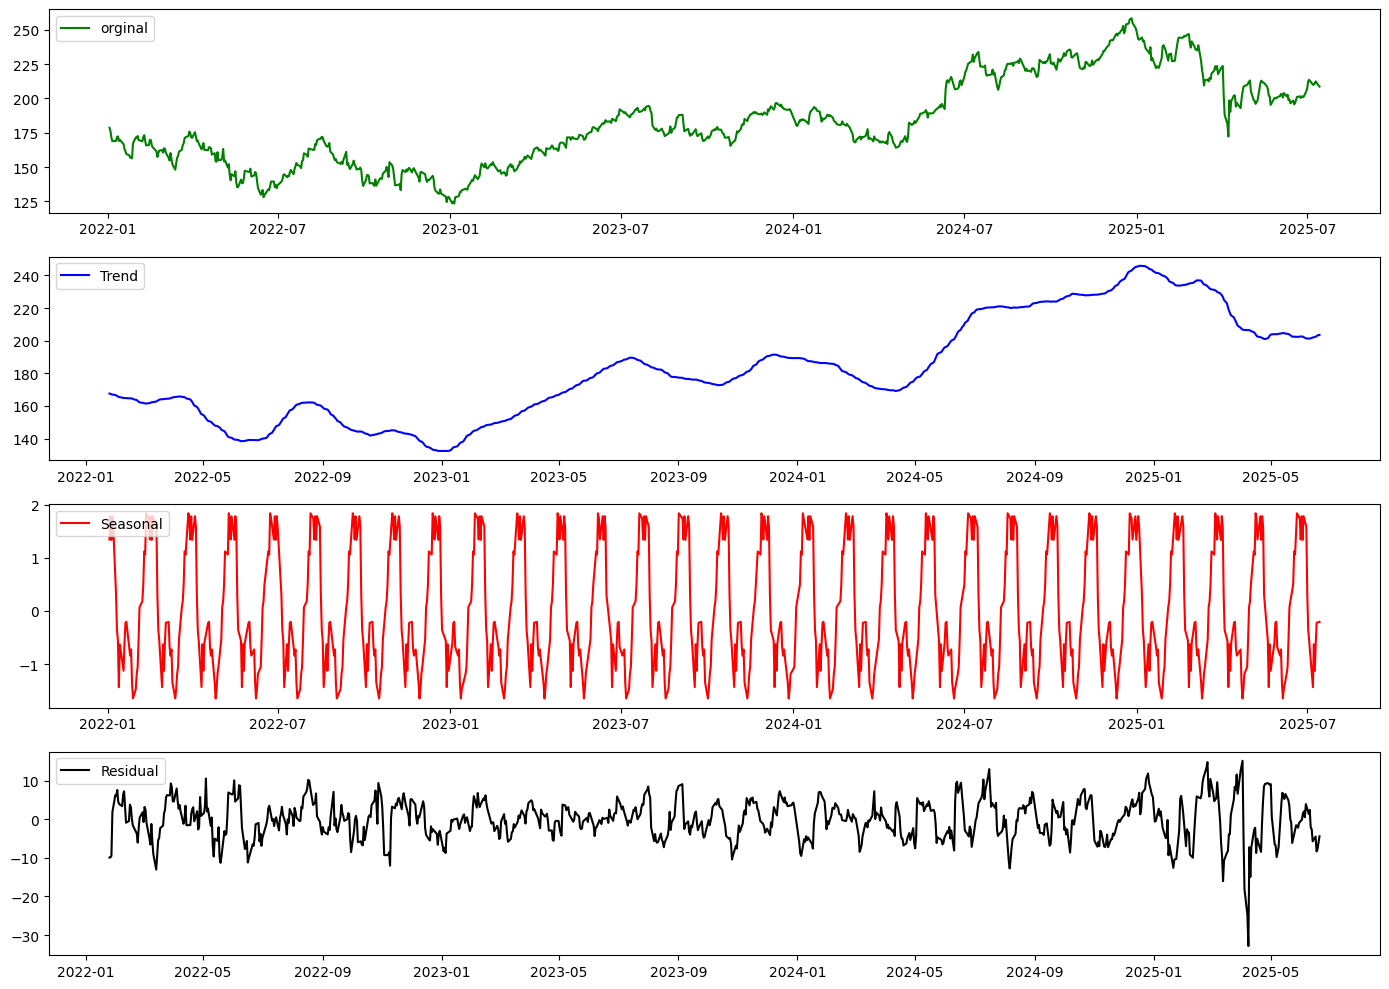

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='orginal',  color ='green')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trends_additive, label='Trend', color ='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color ='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color ='black')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


**STL Decomposti**

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
#perform STL Decomposition
stl = STL(stock_data['Close'], period=30)
result = stl.fit()

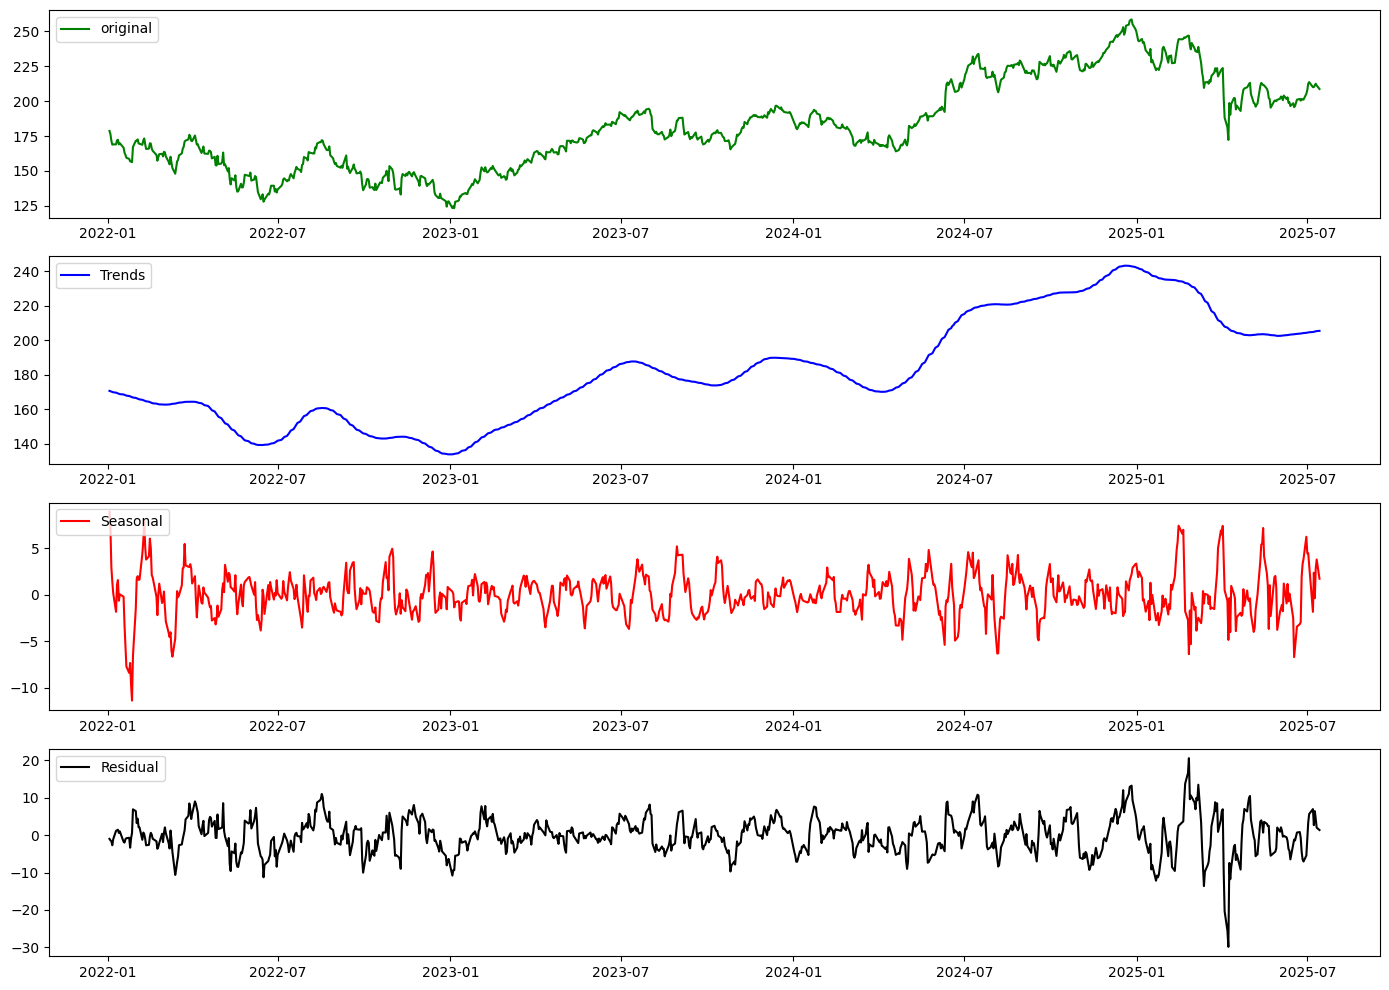

In [ ]:
#plot the decomposition Components
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(result.observed, label= 'original', color='green')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trends', color ='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color ='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color ='black')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Stationarity Test**

The adfuller function in the statsmodels library in Python is used to perform the Augmented Dickey-Fuller (ADF) test. It's a statistical test to check for the presence of a unit root in a time series

In [ ]:
from statsmodels.tsa.stattools import adfuller

#perform the augmented Dickey -fuller test
adf_test = adfuller(stock_data['Close'])
print ('adf_test Result:')
print(f'ADF statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print(f'Critical Values: {adf_test[4]}')

adf_test Result:
ADF statistic: -1.441
p-value: 0.563
Critical Values: {'1%': np.float64(-3.437777420238194), '5%': np.float64(-2.864818761461831), '10%': np.float64(-2.568515845074126)}


In [ ]:
from statsmodels.tsa.stattools import kpss

#perform the KPSS test

kpss_test = kpss(stock_data['Close'])
print ('kpss_test Result:')
print(f'KPSS statistic: {round(kpss_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'{key}: {(value)}')

kpss_test Result:
KPSS statistic: 3.63
p-value: 0.01
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


/tmp/ipython-input-11-2756986460.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'])


**Making Data Stationary**

In [ ]:
#Performing ADF and KPSS tmests

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

def kpss_test(series):
    result = kpss(series)
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'{key}: {value}')

In [ ]:
prices = stock_data['Close']

In [ ]:
adf_test(prices)

ADF Statistic: -1.4408191492876803
p-value: 0.5625581266928456
Critical Values:
1%: -3.437777420238194
5%: -2.864818761461831
10%: -2.568515845074126


(i) Diffrancing

(1st order Diffrancing)

In [ ]:
prices.diff()

Ticker,AAPL
Date,
2022-01-03,NaN
2022-01-04,-2.267334
2022-01-05,-4.691605
2022-01-06,-2.866043
2022-01-07,0.166840
...,...
2025-07-08,0.059998
2025-07-09,1.130005
2025-07-10,1.270004


2nd order Diffrancing

In [ ]:
prices.diff().diff()

Ticker,AAPL
Date,
2022-01-03,NaN
2022-01-04,NaN
2022-01-05,-2.424271
2022-01-06,1.825562
2022-01-07,3.032883
...,...
2025-07-08,3.660004
2025-07-09,1.070007
2025-07-10,0.139999


(ii)Transformations

In [ ]:
import numpy as np
from scipy.stats import stats

#log transformation
price_log = np.log(prices)

#Square root transformation
prices_sqrt = np.sqrt(prices)

#Box-cox transformation
#NOTE-box-cox requires all positive values
#prices_boxcox, lam = stats.boxcox(prices['Close'][prices['Close']>0])

(iii) De- Tranding

In [ ]:
#linerDtranding
from scipy import signal
trend = np.polyfit(np.arange(len(prices)), prices.values.flatten(), 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices.values.flatten() - trendline

In [ ]:
adf_test(prices_detrended)

ADF Statistic: -3.116155418673366
p-value: 0.025380487510404087
Critical Values:
1%: -3.437777420238194
5%: -2.864818761461831
10%: -2.568515845074126


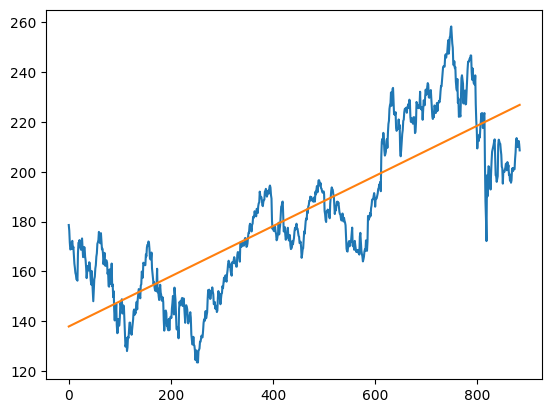

In [ ]:
plt.plot(np.arange(len(prices)),prices)
plt.plot(np.arange(len(prices)), trendline)
plt.show()

In [ ]:
#using a moving average to remove trends

window = 12 #example size
prices_ma = prices.rolling(window=window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()


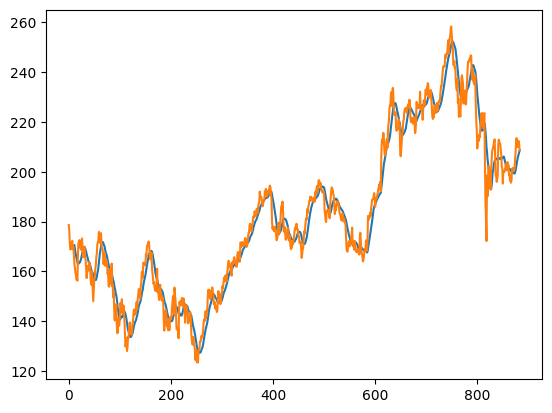

In [ ]:
plt.plot(np.arange(len(prices)),prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [ ]:
#seasonal decomposition useing moving averages

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(prices, model='additive', period=30)
prices_adjusted = prices / decomposition.seasonal
prices_detrended = prices_adjusted.dropna()

**Time Series Forcasting Model**

AR Model

In [ ]:
#making data stationry before model fitting
stock_data = yf.download('AAPL', start='2022-01-01')
apple_price_stationary = stock_data['Close'].diff().dropna()
#split data for train set or test data.
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]

[*********************100%***********************]  1 of 1 completed


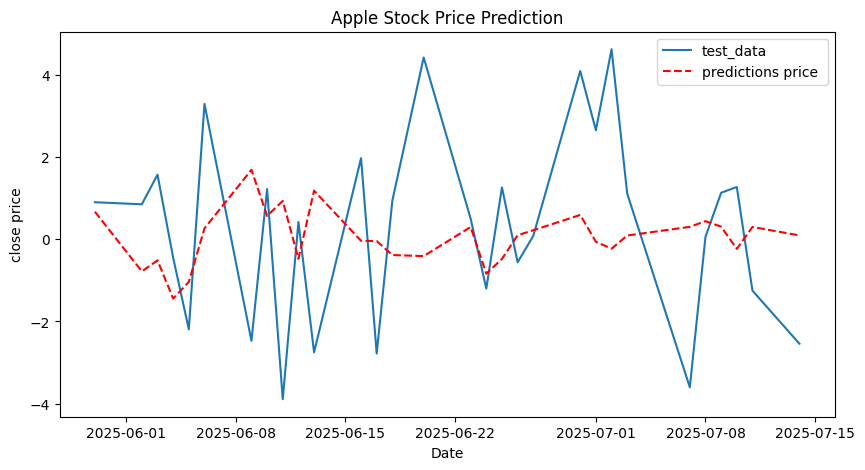

RMSE: 2.5


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags=30)
model_fit = model.fit()

#Make predictions on the test data
predictions = model_fit.predict(
     start=len(train_data),
     end=len(train_data)+len(test_data)-1 ,
     dynamic=False)

#plot the actuall vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label= 'test_data')
plt.plot(test_data.index, predictions, color='red',linestyle='--', label= 'predictions price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('close price')
plt.legend()
plt.show()

#evaluation model using RMSE score
#RMSE, or Root Mean Squared Error, is a frequently used metric to evaluate the accuracy of predictive models.
#It quantifies the average magnitude of the differences between predicted and actual values. Lower RMSE values
#indicate better model accuracy, with 0 representing a perfect fit

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE:', rmse)


**Moving Average Model**

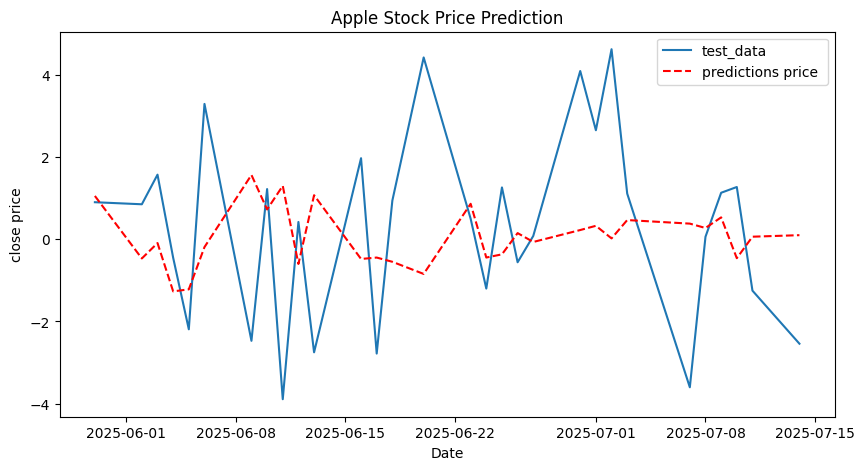

RMSE: 2.53


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#fit the (MV) model to the traning data
model = ARIMA(train_data, order=(0,0,30))
model_fit = model.fit()

#make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False)

#plot the actuall vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label= 'test_data')
plt.plot(test_data.index, predictions, color='red',linestyle='--', label= 'predictions price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('close price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE:', rmse)


ARIMA Model

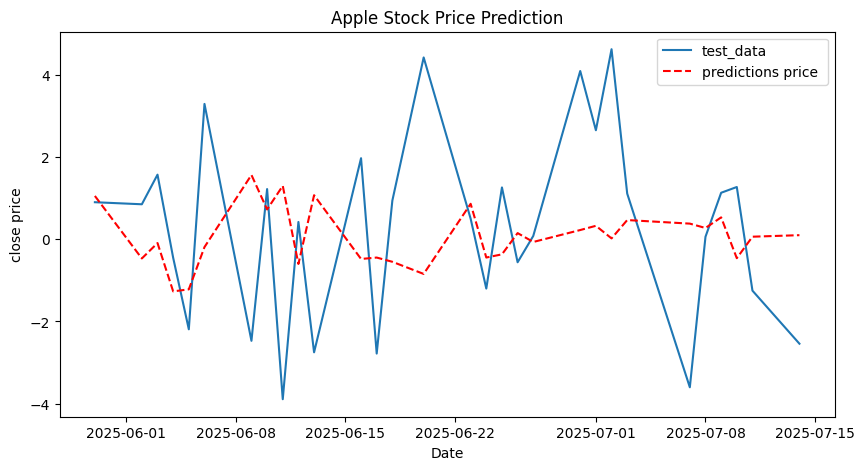

RMSE: 2.53


In [ ]:
#Fit the Moving Average (MA) model to the training data

Model = ARIMA(train_data, order=(7,1,7))
model_fit = model.fit()

#Make predictions on the test data
predictions = model_fit.predict (
        start = len(train_data),
        end = len(train_data)+len(test_data)-1,
        dynamic = False
)



#plot the actuall vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label= 'test_data')
plt.plot(test_data.index, predictions, color='red',linestyle='--', label= 'predictions price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('close price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE:', rmse)

**SARIMA MODEL**

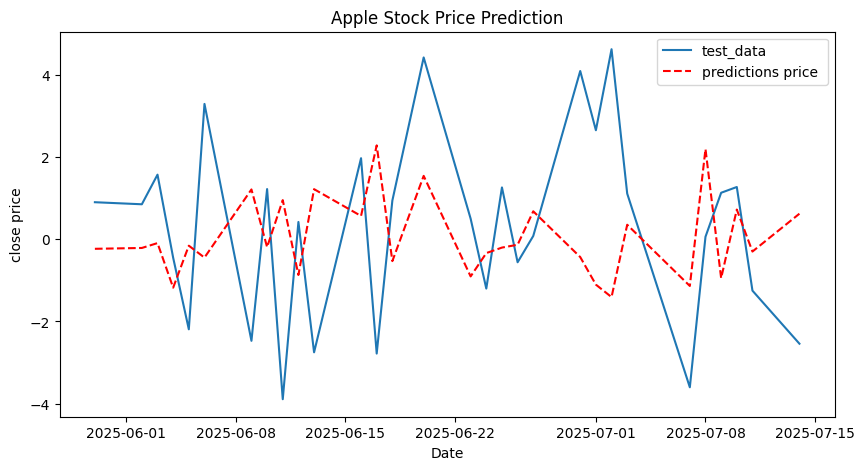

RMSE: 2.72


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p,d,q = 7,1,7
P,D,Q,S = 1,1,1,30

#Fit the SARIMA model
model = SARIMAX(train_data, order=(p,d,q), seasonal_order=(P,D,Q,S))
model_fit = model.fit()

#Make predictions on the data
predictions = model_fit.predict(
    start=len(train_data),
    end=len(train_data)+len(test_data)-1,
    dynamic=False)

#plot the actuall vs predicted values
plt.figure(figsize=(10,5))
plt.plot(test_data.index, test_data, label= 'test_data')
plt.plot(test_data.index, predictions, color='red',linestyle='--', label= 'predictions price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('close price')
plt.legend()
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE:', rmse)


**Vector Models**

Multi - variant two - Data set

In [ ]:
tsla_data = yf.download('TSLA', start='2022-01-01')
stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['APP_Close'] = stock_data['Close'].shift()
stock_data.dropna(inplace=True)

from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-causality test
grangercausalitytests(stock_data[['APP_Close', 'TSLA_Close']].dropna(), maxlag=[14])
print()

[*********************100%***********************]  1 of 1 completed


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=20.8711 , p=0.0000  , df_denom=840, df_num=14
ssr based chi2 test:   chi2=302.2835, p=0.0000  , df=14
likelihood ratio test: chi2=259.4072, p=0.0000  , df=14
parameter F test:         F=20.8711 , p=0.0000  , df_denom=840, df_num=14



In [ ]:
data = stock_data[['APP_Close', 'TSLA_Close']].diff().dropna()
train_data, test_data = data[:-14], data[-14:]

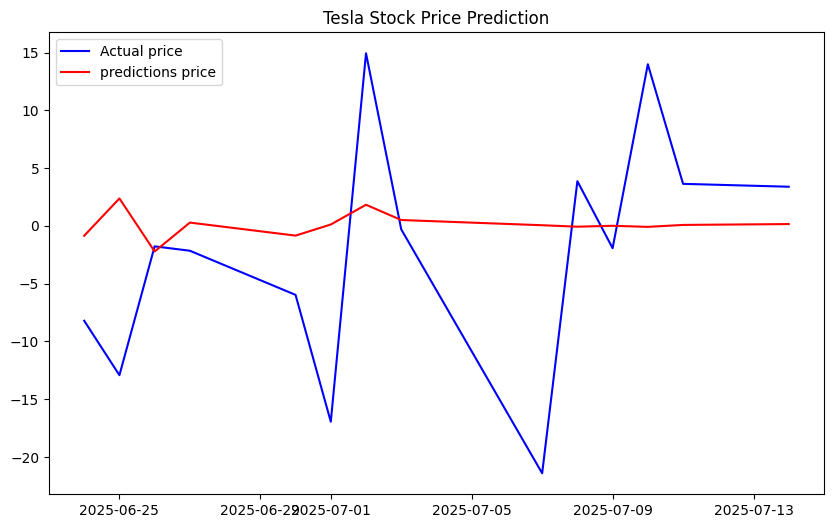

RMSE: 10.3


In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR#, VARMAX

#VAR
model = VAR(train_data)
model_fit = model.fit(maxlags=7)

predictions = model_fit.forecast(train_data.values[-model_fit.k_ar:],steps=len(test_data) )

predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label= 'Actual price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label= 'predictions price',color='red' )
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'],predictions['TSLA_Close'])),2)
print('RMSE:', rmse)